# Jen Wang

## Research Question and Interests

As someone who always reads reviews before trying a game, I find that the general consensus often reflects the actual state of the game. This consistent observation sparked my interest in identifying the top 5 most popular games of 2023-2024 based on rating trends. To determine this, I will analyze games with the highest average among a combination of factors: review scores, the ratio of positive to negative reviews, and the percentage of positive reviews, while also considering total reviews. This question is feasible, as it relies on quantifiable metrics found in the dataset, such as review scores and review sentiment on the game. These metrics also allow for comparison, as it provides insight on what makes a game popular versus not popular. By determining which game has the highest count of positive reviews or review scores, a clear metric for popularity can be established. 

The question also carries a layer of sophistication, as it involves analyzing multiple attributes collectively rather than relying on a single factor, making it novel. Further analyzation on what helps make the game popular increases its sophistication. Additionally, the question is inherently interesting as the results may be surprising, either showing a competitive tie at the top or a single game dominating. Since the data is publicly available, and the data itself is collected through Steam API, the study meets ethical standards. Finally, as this study revolves around the analysis of Steam games, this question is relevant towards understanding gaming trends and consumer behavior within the digital market. 

In [21]:
# Run this cell to ensure that altair plots show up without having
# the notebook be really large.
# We will talk more about what these lines do later in the course

import os
import altair as alt
import pandas as pd
from toolz.curried import pipe

# Create a new data transformer that stores the files in a directory
def json_dir(data, data_dir='altairdata'):
    os.makedirs(data_dir, exist_ok=True)
    return pipe(data, alt.to_json(filename=data_dir + '/{prefix}-{hash}.{extension}') )

# Register and enable the new transformer
alt.data_transformers.register('json_dir', json_dir)
alt.data_transformers.enable('json_dir')

# Handle large data sets (default shows only 5000)
# See here: https://altair-viz.github.io/user_guide/data_transformers.html
alt.data_transformers.disable_max_rows()

alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [2]:
path = '../../data/processed/cleaned_games.csv'
data = pd.read_csv(path)
print(data.shape)
data.head()

(58041, 21)


,Unnamed: 0,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,...,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
0,0,2719580,勇者の伝説の勇者,['ぽけそう'],['ぽけそう'],"['Single-player', 'Family Sharing']","['Casual', 'Indie']",0,0,['windows'],...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.99
1,2,2719600,Lorhaven: Cursed War,['GoldenGod Games'],['GoldenGod Games'],"['Single-player', 'Multi-player', 'PvP', 'Shar...","['RPG', 'Strategy']",0,32,"['windows', 'mac']",...,[],9,8,1,0.0,9 user reviews,88.9,0,False,9.99
2,3,2719610,PUIQ: Demons,['Giammnn'],['Giammnn'],"['Single-player', 'Steam Achievements', 'Famil...","['Action', 'Casual', 'Indie', 'RPG']",0,28,['windows'],...,[],0,0,0,0.0,No user reviews,0.0,0,False,2.99
3,4,2719650,Project XSTING,['Saucy Melon'],['Saucy Melon'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Casual', 'Indie', 'Early Access']",0,42,['windows'],...,[],9,9,0,0.0,9 user reviews,100.0,0,False,7.99
4,7,2719710,Manor Madness,['Apericot Studio'],['Apericot Studio'],"['Single-player', 'Steam Achievements', 'HDR a...","['Action', 'Adventure', 'Indie', 'RPG', 'Simul...",0,5,"['windows', 'mac', 'linux']",...,[],0,0,0,0.0,No user reviews,0.0,0,True,0.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58041 entries, 0 to 58040
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           58041 non-null  int64  
 1   steam_appid          58041 non-null  int64  
 2   name                 58041 non-null  object 
 3   developers           58041 non-null  object 
 4   publishers           58041 non-null  object 
 5   categories           58041 non-null  object 
 6   genres               58041 non-null  object 
 7   required_age         58041 non-null  int64  
 8   n_achievements       58041 non-null  int64  
 9   platforms            58041 non-null  object 
 10  release_date         58041 non-null  object 
 11  additional_content   58041 non-null  object 
 12  total_reviews        58041 non-null  int64  
 13  total_positive       58041 non-null  int64  
 14  total_negative       58041 non-null  int64  
 15  review_score         58041 non-null 

Since there is no missing value based on the non-null count, there is no need for further filtering. As I am interested in review scores, I will take a look at the unique values in attribute review_score_desc. 

In [4]:
data['review_score_desc'].unique()

array(['No user reviews', '9 user reviews', '1 user reviews',
       '5 user reviews', 'Positive', '3 user reviews', '2 user reviews',
       'Mostly Positive', 'Very Positive', 'Negative', '4 user reviews',
       'Overwhelmingly Positive', '8 user reviews', '6 user reviews',
       'Mixed', '7 user reviews', 'Mostly Negative', 'Very Negative',
       'Overwhelmingly Negative'], dtype=object)

In [5]:
data.describe()

,Unnamed: 0,steam_appid,required_age,n_achievements,total_reviews,total_positive,total_negative,review_score,positive_percentual,metacritic,price_initial (USD)
count,58041.000000,5.804100e+04,58041.000000,58041.000000,5.804100e+04,5.804100e+04,58041.000000,58041.000000,58041.000000,58041.000000,58041.000000
mean,36514.232439,1.477672e+06,3.161403,19.788443,5.048798e+02,4.433147e+02,61.565083,2.698661,56.749991,3.161403,8.016004
std,20389.435037,8.362123e+05,15.002913,152.944774,9.304848e+03,8.217716e+03,1298.842646,3.323821,39.538575,15.002913,14.185095
min,0.000000,7.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18878.000000,7.998700e+05,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.990000
50%,37161.000000,1.395250e+06,0.000000,5.000000,5.000000e+00,4.000000e+00,1.000000,0.000000,70.500000,0.000000,4.990000
75%,53886.000000,2.268880e+06,0.000000,20.000000,3.000000e+01,2.300000e+01,7.000000,6.000000,92.400000,0.000000,9.990000
max,71428.000000,3.430140e+06,97.000000,9821.000000,1.279700e+06,1.107275e+06,172425.000000,9.000000,100.000000,97.000000,999.980000


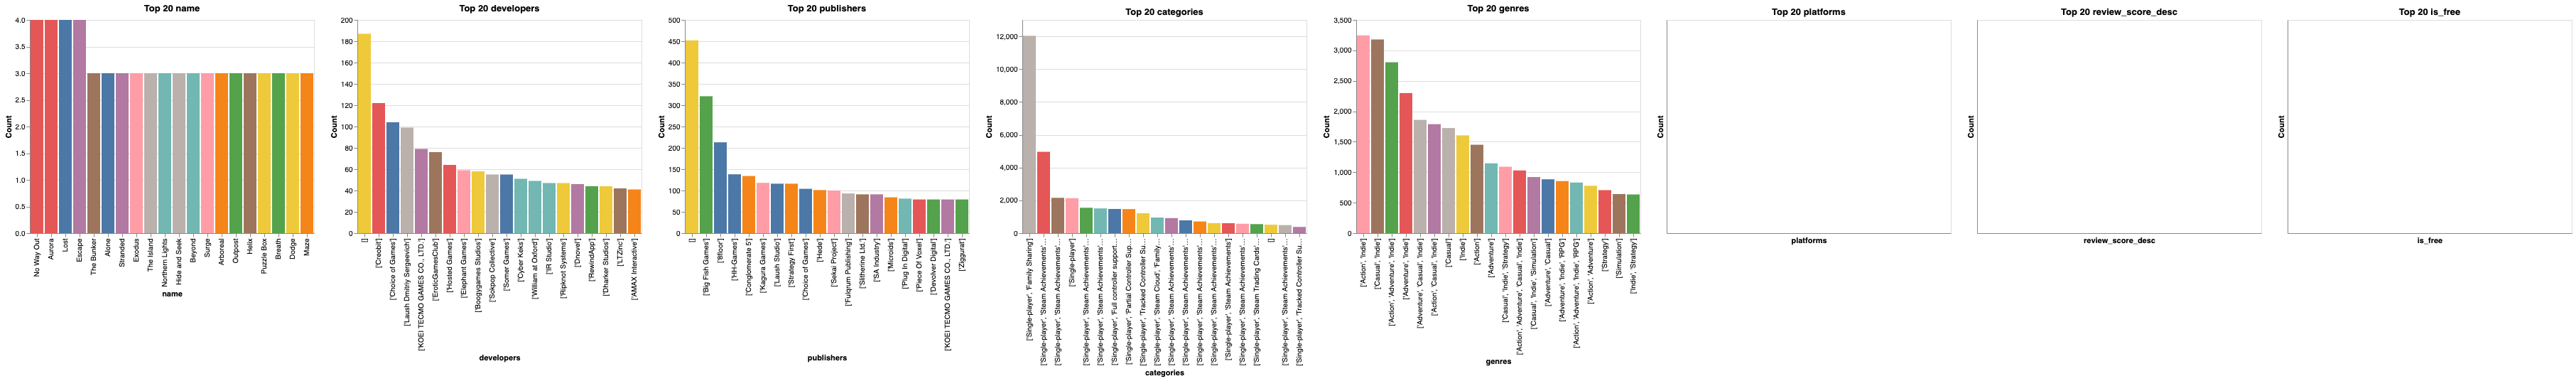

In [6]:
top_n = 20  
categorical_cols = ['name', 'developers', 'publishers', 'categories', 'genres', 
                    'platforms', 'review_score_desc', 'is_free']

cat_charts = []
for col in categorical_cols:
    top_values = data[col].value_counts().nlargest(top_n).index
    filtered_data = data[data[col].isin(top_values)]

    chart = alt.Chart(filtered_data).mark_bar().encode(
        alt.X(f"{col}:N", title=col, sort='-y'),
        alt.Y('count()', title='Count'),
        alt.Color(f"{col}:N", legend=None)
    ).properties(
        title=f"Top {top_n} {col}",
        width=400,
        height=300
    )

    cat_charts.append(chart)

alt.hconcat(*cat_charts)

We created simple boxplots to display univariate summaries for all categorical variables. However, due to the sheer number of unique categories in some attributes, such as name and developers, we decided to limit our analysis to only account for the top 20. Noteable categories included platforms, where Windows dominates against all the other platforms, review_score_desc, where most games had no user reviews, and is_free, which revealed that the majority games on Steam are not free. 

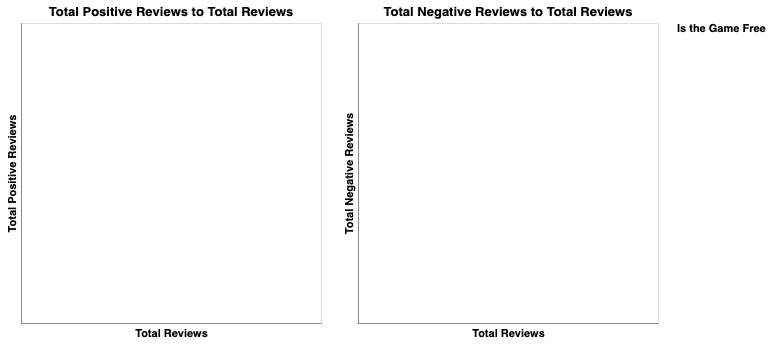

In [7]:
### Figure 1 ###

## Figure 1a ##
scatter_post_review = alt.Chart(data).mark_point(opacity=0.3).encode(
    alt.X('total_reviews', title="Total Reviews"),
    alt.Y('total_positive', title='Total Positive Reviews'),
    alt.Tooltip(['name', 'developers']),
    alt.Color('is_free', title = 'Is the Game Free')
).properties(
    title='Total Positive Reviews to Total Reviews'
)

## Figure 1b ##
scatter_neg_review = alt.Chart(data).mark_point(opacity=0.3).encode(
    alt.X('total_reviews', title="Total Reviews"),
    alt.Y('total_negative', title='Total Negative Reviews'),
    alt.Tooltip(['name', 'developers']),
    alt.Color('is_free', title = 'Is the Game Free')
).properties(
    title='Total Negative Reviews to Total Reviews'
)

scatter_post_review | scatter_neg_review

Since my area of interest is to look at the trending games from 2023-2024, I decided to explore and compare the positive and negative reviews against all the reviews Steam games have received.

From the Total Positive Reviews to Total Reviews scatterplot (Figure 1a), there seems to be a positive correlation between total reviews on Steam and total positive reviews. Although most range from 0 to under 600,000 reviews and positive reviews, there is one game, Counter-Strike 2, that dominates at a high end of over a million reviews and positive reviews. Interestingly, the developers for that game, Valve, are the same developers for Steam. Finally, the majority of the games are not free, but Counter-Strike 2 is free.

In contrast, the Total Negative Reviews to Total Reviews scatterplot (Figure 1b) has much fewer reviews in general compared to Figure 1a. The graph also does not appear to have a distinct correlation between negative reviews and total reviews, with most of the games grouped together near the x-axis. Finally, similar to Figure 1a, Counter-Strike 2 dominates at the high end of the graph, with the only game having over 160,000 negative reviews. 

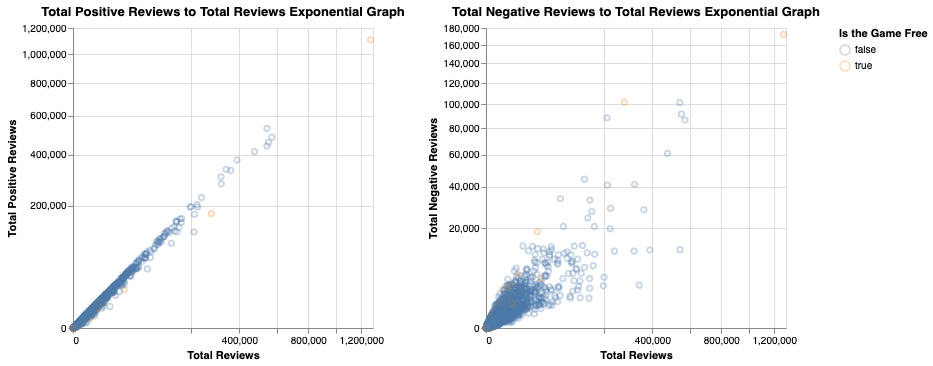

In [15]:
### Figure 2a ###


## Figure 2a ##
scatter_post_review_exp = alt.Chart(data).mark_point(opacity=0.3).encode(
    alt.X('total_reviews', title="Total Reviews", scale=alt.Scale(type='pow', exponent=0.5)),
    alt.Y('total_positive', title='Total Positive Reviews', scale=alt.Scale(type='pow', exponent=0.5)),
    alt.Tooltip(['name', 'developers']),
    alt.Color('is_free', title = 'Is the Game Free')
).properties(
    title='Total Positive Reviews to Total Reviews Exponential Graph'
)

## Figure 2b ##
scatter_neg_review_exp = alt.Chart(data).mark_point(opacity=0.3).encode(
    alt.X('total_reviews', title="Total Reviews", scale=alt.Scale(type='pow', exponent=0.5)),
    alt.Y('total_negative', title='Total Negative Reviews', scale=alt.Scale(type='pow', exponent=0.5)),
    alt.Tooltip(['name', 'developers']),
    alt.Color('is_free', title = 'Is the Game Free')
).properties(
    title='Total Negative Reviews to Total Reviews Exponential Graph'
)

scatter_post_review_exp | scatter_neg_review_exp

Since most of the games in Figure 1b were clustered within the 0-20,000 range, I decided to apply a square root transformation to the data for better visualization. Comparing the Total Negative Reviews to Total Reviews Exponential Graph (Figure 2b) to the Total Positive Reviews to Total Reviews Exponential Graph (Figure 2a), I noticed that some of the games, such as Call of Duty and PUBG: BATTLEGROUNDS, had a low positive to negative review ratio of about 2:1. In comparison, games like HELLDIVERS 2 exhibited a much higher ratio of 4:1. 

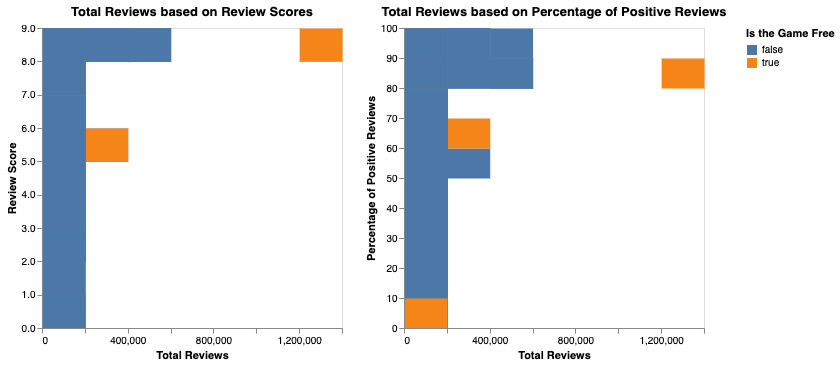

In [49]:
### Figure 3 ###

## Figure 3a ##
heatmap_review_score = alt.Chart(data).mark_rect().encode(
    alt.X('total_reviews:Q', bin=True, title="Total Reviews"),
    alt.Y('review_score:Q', bin=True, title="Review Score"),
    alt.Color('is_free', title="Is the Game Free"),
    alt.Tooltip('name')
).properties(
    title="Total Reviews based on Review Scores"
)

## Figure 3b ##
heatmap_review_pct = alt.Chart(data).mark_rect().encode(
    alt.X('total_reviews:Q', bin=True, title="Total Reviews"),
    alt.Y('positive_percentual:Q', bin=True, title="Percentage of Positive Reviews"),
    alt.Color('is_free', title="Is the Game Free"),
    alt.Tooltip('name')
).properties(
    title="Total Reviews based on Percentage of Positive Reviews"
)

heatmap_review_score | heatmap_review_pct

Finally, I analyzed the games with the highest review scores relative to total reviews (Figure 3a). Despite having a large number of total reviews, Counter-Strike 2 consistently maintains a high review score, ranging from 8.0 to 9.0. It is followed by Rust, Cyberpunk 2077, and Goobies, all of which also received review scores within the 8.0–9.0 range.

In contrast, the heatmap showing the percentage of positive reviews relative to total reviews (Figure 3b) reveals that Counter-Strike 2, Rust, and Cyberpunk 2077 fall within the 80-90% range, while Goobies stands out with a much higher percentage, between 90-100%.